In [6]:
import warnings
warnings.filterwarnings("ignore")

import os
import sys
import time
import json
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

from pprint import pprint

import src
from src.reload import deep_reload

In [191]:
deep_reload(src)

seed = 1468952
rng = np.random.default_rng(seed)

servers = 4
server_kw = {
    'rng': rng,
    'service_rate': lambda rng: rng.choice([50, 80, 100, 120]) * 1e3, # [W]
}

servers = [src.queuing.Server(**server_kw) for idx in range(servers)]

demand_kw = {
    'rng': rng,
    'spawn_criteria': lambda rng: rng.random() <= 1 / 10, # [Bool]
    'capacity': lambda rng: rng.normal(45, 15) * 3.6e6, # [J]
}

demand = src.queuing.Demand(**demand_kw)

system = src.queuing.System(servers, demand)

queue, served, status = system.simulate(steps = 24 * 3600, step = 60)

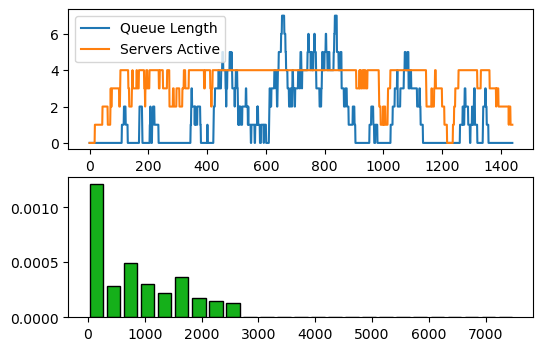

In [197]:
steps = np.array([customer.steps - customer.steps_service for customer in served])

fig, ax = plt.subplots(2, 1, figsize = (6, 4))

ax[0].plot(status['in_queue'], label = 'Queue Length')
ax[0].plot(status['in_service'], label = 'Servers Active')

ax[0].legend()

kw = {
    'rwidth': .8,
    'ec': 'k',
    'fc': 'xkcd:green',
    'bins': list(range(0, 7800, 300)),
    'density': True,
}

_ = ax[1].hist(steps, **kw)

In [187]:
served[0].__dict__

{'capacity': 125023502.96653537,
 'level': 129600000.0,
 'steps': 1080,
 'steps_service': 1080,
 'status': 'complete'}

In [154]:
servers[0].__dict__

{'rng': Generator(PCG64) at 0x7EFC154B2A40,
 'service_rate': 4800000.0,
 'customer': <src.queuing.Customer at 0x7efc1555aed0>,
 'status': 'occupied'}